# Elastix

This notebooks show very basic image registration examples with on-the-fly generated binary images.

In [21]:
from itk import itkElastixRegistrationMethodPython
from itk import itkTransformixFilterPython
import itk
import numpy as np
import matplotlib.pyplot as plt

## Image generators

In [42]:
def image_generator(x1, x2, y1, y2, upsampled=False, bspline=False,
                   mask=False, artefact=False):
    if upsampled:
        image = np.zeros([1000, 1000], np.float32)
    elif mask:
        image = np.zeros([100, 100], np.uint8)
    else:
        image = np.zeros([100, 100], np.float32)
    for x in range(x1, x2):
        for y in range(y1, y2):
            if bspline:
                y += x
                if x > 99 or y > 99:
                    pass
                else:
                    image[x, y] = 1
            else:
                image[x, y] = 1
    if artefact:
        image[:, -10:] = 1
    image = itk.image_view_from_array(image)
    return image

### Groupwise Registration Test

In [19]:
# Create a vector of images for a 2D+time example in numpy
vector_of_images = np.zeros([6, 100, 100], np.float32)
i = 0
for x in range(0, 30, 5):
    image = image_generator(x, x+50, x, x+50)
    vector_of_images[i] = image
    i += 1

vector_itk = itk.image_view_from_array(vector_of_images)

# Create Groupwise Parameter Object
parameter_object = itk.ParameterObject.New()
groupwise_parameter_map = parameter_object.GetDefaultParameterMap('groupwise')
parameter_object.AddParameterMap(groupwise_parameter_map)

result_image, result_transform_parameters = itk.elastix_registration_method(
    vector_itk, vector_itk,
    parameter_object=parameter_object,
    log_to_console=True)

### Groupwise Registration Test Visualization (to be continued...)

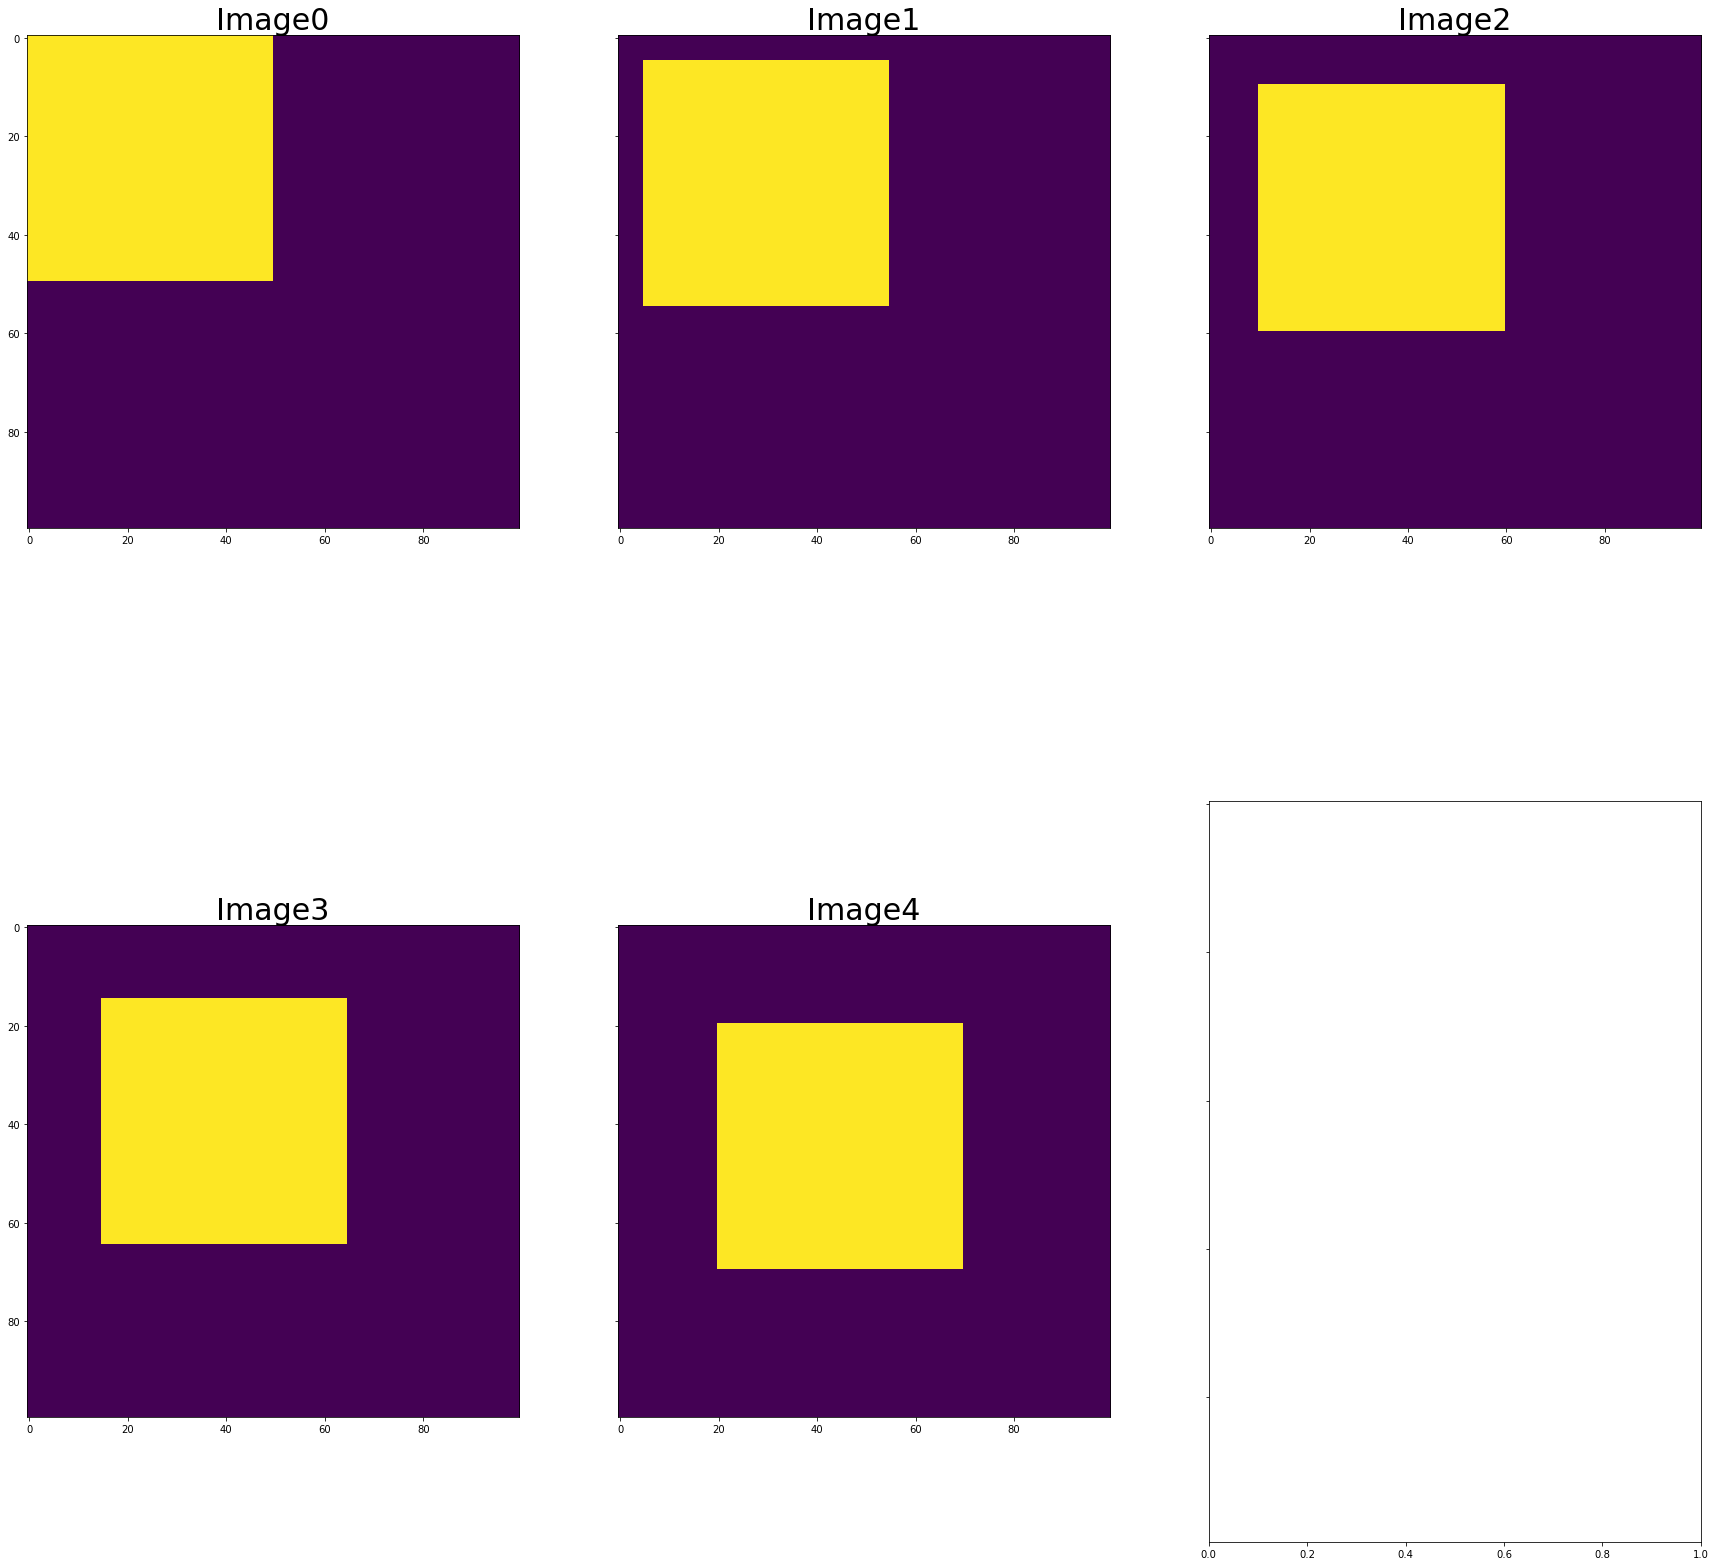

In [22]:
%matplotlib inline

# Plot images
fig, axs = plt.subplots(2,3, sharey=True, figsize=[30,30])
plt.figsize=[100,100]
axs[0,0].imshow(vector_of_images[0])
axs[0,0].set_title('Image0', fontsize=30)
axs[0,1].imshow(vector_of_images[1])
axs[0,1].set_title('Image1', fontsize=30)
axs[0,2].imshow(vector_of_images[2])
axs[0,2].set_title('Image2', fontsize=30)
axs[1,0].imshow(vector_of_images[3])
axs[1,0].set_title('Image3', fontsize=30)
axs[1,1].imshow(vector_of_images[4])
axs[1,1].set_title('Image4', fontsize=30)
# axs[1,2].imshow(result_image)
# axs[1,2].set_title('Result', fontsize=30)
plt.show()